In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style



El objetivo del proyecto de tesis es comparar la mejora del aprendizaje conceptual de la noción de fuerza en estudiantes de física e ingeniería de la Universidad de Guadalajara entre la enseñanza tradicional y una serie de actividades desarrolladas por la autora de la tesis, donde implementa simulaciones interactivas (Phet).

Para medir la ganancia de aprendizaje conceptual, se utiliza el Force Concept Inventory (FCI), que consta de 30 preguntas de opción múltiple, donde solo hay una opción correcta. En el proyecto, hay 2 grupos de control y 2 grupos experimentales, a los cuales se les aplican las actividades con simulaciones interactivas. El cuestionario se administra en forma de pre-test (antes de cursar la asignatura) y de post-test (después de haber visto los temas de fuerzas), para calcular el factor de Hake, que indica la ganancia conceptual.

Los test, en ambas modalidades, se aplicaron en Google Forms, obteniendo los siguientes conjuntos de datos.


In [2]:
control_1_post = pd.read_csv('/content/drive/MyDrive/FCI/C1/(Post-23B; C1) Cuestionario sobre el Concepto de Fuerza - (Post-23B; C1) Cuestionario sobre el Concepto de Fuerza.csv')
control_1_pre = pd.read_csv('/content/drive/MyDrive/FCI/C1/(Pre-23B; C1) Cuestionario sobre el Concepto de Fuerza - (Pre-23B; C1) Cuestionario sobre el Concepto de Fuerza.csv')
exp_2_pre = pd.read_csv('/content/drive/MyDrive/FCI/E2/(Pre-23B; E2) Cuestionario sobre el Concepto de Fuerza - (Pre-23B; E2) Cuestionario sobre el Concepto de Fuerza.csv')
exp_2_post = pd.read_csv('/content/drive/MyDrive/FCI/E2/(Post-23B; E2) Cuestionario sobre el Concepto de Fuerza - (Post-23B; E2) Cuestionario sobre el Concepto de Fuerza.csv')
control_2_pre = pd.read_csv('/content/drive/MyDrive/FCI/E2/(Pre-23B; C2) Cuestionario sobre el Concepto de Fuerza - (Pre-23B; C2) Cuestionario sobre el Concepto de Fuerza.csv')
exp_3_pre = pd.read_csv('/content/drive/MyDrive/FCI/E3/(Pre-23B; E3) Cuestionario sobre el Concepto de Fuerza - (Pre-23B; E3) Cuestionario sobre el Concepto de Fuerza.csv')
exp_3_post = pd.read_csv('/content/drive/MyDrive/FCI/E3/(Post-23B; E3) Cuestionario sobre el Concepto de Fuerza - (Post-23B; E3) Cuestionario sobre el Concepto de Fuerza.csv')


Cada conjunto de datos contiene información sobre los estudiantes (nombre, carrera, semestre y si repiten la materia), el puntaje total del test y las respuestas a cada pregunta individual. Para facilitar el análisis, se modifican los nombres de las columnas de los puntajes totales para identificar los puntos del pre-test y del post-test.

Además, para determinar qué alumnos respondieron tanto al pre-test como al post-test, se combinan los dataframes por grupo utilizando el nombre de usuario como referencia, ya que el dato del correo electrónico es el mismo para cada alumno en ambos conjuntos de datos. Se cometió un error al aplicar el post-test al grupo control 2, y las respuestas terminaron en el post-test del grupo experimental 2. Por lo tanto, la fusión se tuvo que realizar entre el conjunto pre-test del control 2 y el post-test del experimental 2.

In [3]:
control_1_post = control_1_post.rename(columns={'Puntuación total': 'Puntuación-Post'}, inplace=False)
control_1_pre = control_1_pre.rename(columns={'Puntuación total': 'Puntuación-Pre'}, inplace=False)
exp_2_pre = exp_2_pre.rename(columns={'Puntuación total': 'Puntuación-Pre'}, inplace=False)
exp_2_post = exp_2_post.rename(columns={'Puntuación total': 'Puntuación-Post'}, inplace=False)
control_2_pre = control_2_pre.rename(columns={'Puntuación total': 'Puntuación-Pre'}, inplace=False)
exp_3_pre = exp_3_pre.rename(columns={'Puntuación total': 'Puntuación-Pre'}, inplace=False)
exp_3_post = exp_3_post.rename(columns={'Puntuación total': 'Puntuación-Post'}, inplace=False)


In [4]:
exp_2_full = pd.merge(exp_2_pre, exp_2_post, on='Nombre de usuario')
exp_3_full = pd.merge(exp_3_pre, exp_3_post, on='Nombre de usuario')
control_2_full = pd.merge(control_2_pre, exp_2_post, on='Nombre de usuario')
control_1_full = pd.merge(control_1_pre, control_1_post, on='Nombre de usuario')

Dado que los valores de las puntuaciones están representados como cadenas de fracciones, donde el numerador corresponde a las respuestas correctas y el denominador representa el total de preguntas, se procede a modificar estas columnas para que únicamente contengan el valor de las respuestas correctas, cambiando además el tipo de variable a float.


In [5]:
grupos_full = [exp_2_full, control_2_full, exp_3_full, control_1_full]

for grupo in grupos_full:
    grupo['Puntuación-Pre'] = grupo['Puntuación-Pre'].str.split('/', expand=True)[0].astype(float)
    grupo['Puntuación-Post'] = grupo['Puntuación-Post'].str.split('/', expand=True)[0].astype(float)

Al revisar los conjuntos de datos, se identificaron varias columnas vacías que corresponden a comentarios para cada una de las preguntas. Por lo tanto, se decidió eliminar dichas columnas.

In [6]:
for grupo in grupos_full:
    grupo.dropna(axis=1, inplace=True)


El factor de hake se calcula de la siguiente manera
\begin{equation}
g=\frac{post\%-pre\%}{100-pre\%}
\end{equation}
Indica la ganancia de aprendizaje conceptual, donde post% y pre% son los porcentajes de preguntas correctas en los test en ambas modalidades. Para cada grupo, se calcula el promedio de puntuaciones en el pre-test y post-test. Con estos resultados, se determina el porcentaje de ganancia, y se clasifica la ganancía como baja, media o alta de la siguiente manera
\begin{equation}
Alta: g\geq0.7
\end{equation}
\begin{equation}
Media: 0.7>g\geq0.3
\end{equation}
\begin{equation}
Alta: g<0.3
\end{equation}



In [7]:
valores_hake = []
promedios_pre = []
promedios_post = []
num_preguntas = 30
for grupo in grupos_full:
    pre_promedio = grupo['Puntuación-Pre'].mean() * 100 / num_preguntas
    post_promedio = grupo['Puntuación-Post'].mean() * 100 / num_preguntas
    hake = (post_promedio - pre_promedio) / (100 - pre_promedio)
    promedios_pre.append(pre_promedio)
    promedios_post.append(post_promedio)
    valores_hake.append(hake)

hake_por_grupo = {'Exp 2': valores_hake[0],'Exp 3': valores_hake[2], 'Control 1':valores_hake[1],'Control 2':valores_hake[3]}
hake_por_grupo

{'Exp 2': 0.49411764705882344,
 'Exp 3': 0.34814814814814804,
 'Control 1': 0.021857923497267798,
 'Control 2': 0.1048951048951049}

Para analizar más a profundidad los resultados se realizó una función que calcula el porcentaje de respuestas correctas del pre y post, factor de hake y clasificación de ganancia por cada pregunta del FCI. En los datos originales por cada pregunta hay una columna que indica si la opción escogida por el alumno es la correcta indicado con un 1, o incorrecta indicado con un 0. Con esto se puede calcular facilmente los porcentajes, que con estos resultados se encuentra el factor de hake. Como los datos estaban representados en una fracción 1/1 o 0/1 y en forma de string, se tuvo que separar el string y convertir unicamente el numerador a float.

In [8]:

def porcentajes_pregunta(grupo):
  resultados = pd.DataFrame()
  porcentajes_pre = []
  porcentajes_post = []
  clasificacion = []
  pre_test = '_x'
  post_test = '_y'
  for pregunta in range(1,num_preguntas+1):
    grupo[str(pregunta) + pre_test] = grupo[str(pregunta) + pre_test].str.split('/', expand = True)[0].astype(float)
    suma = grupo[str(pregunta) + pre_test].sum()
    porcentaje = (suma/len( grupo[str(pregunta) + pre_test]))*100
    porcentajes_pre.append(porcentaje)
  for pregunta in range(1,num_preguntas+1):
    grupo[str(pregunta) + post_test] = grupo[str(pregunta) + post_test].str.split('/', expand = True)[0].astype(float)
    suma = grupo[str(pregunta) + post_test].sum()
    porcentaje = (suma/len( grupo[str(pregunta) + post_test]))*100
    porcentajes_post.append(porcentaje)
  resultados['Porcentajes Pre']  = porcentajes_pre
  resultados['Porcentajes Post']  = porcentajes_post
  resultados['Hake por pregunta'] = (resultados['Porcentajes Post']-resultados['Porcentajes Pre'])/(100-resultados['Porcentajes Pre'])
  for hake in resultados['Hake por pregunta']:
    if hake>=0.7:
      clasificacion.append('Alta')
    elif 0.7>hake>=0.3:
      clasificacion.append('Media')
    else:
      clasificacion.append('Baja')
  resultados['Clasificación'] = clasificacion
  return resultados




In [9]:
preguntas_control_1 = porcentajes_pregunta(control_1_full)
preguntas_control_2 = porcentajes_pregunta(control_2_full)
preguntas_exp_2 = porcentajes_pregunta(exp_2_full)
preguntas_exp_3 = porcentajes_pregunta(exp_3_full)


In [10]:
preguntas_control_1.index = preguntas_control_1.index + 1
preguntas_control_2.index = preguntas_control_2.index + 1
preguntas_exp_2.index = preguntas_exp_2.index + 1
preguntas_exp_3.index = preguntas_exp_3.index + 1

A continuación, se calcula el porcentaje de aprendizaje significativo para cada grupo, es decir, aquel que se considera con una ganancia de aprendizaje media o alta. Para determinar este porcentaje, se examina la ganancia, pregunta por pregunta, con el fin de comparar el porcentaje que cumple con la condición para ser considerado significativo.


In [52]:
preguntas_por_grupo = [preguntas_control_1, preguntas_control_2,preguntas_exp_2,preguntas_exp_3]
porcentaje_aprendizaje_significativo = []
for grupo in preguntas_por_grupo:
  porcentaje = grupo.loc[(grupo['Clasificación']=='Media')|(grupo['Clasificación']=='Alta')].shape[0]*100/grupo.shape[0]
  porcentaje_aprendizaje_significativo.append(porcentaje)

In [11]:
xpos = np.arange(preguntas_control_1.shape[0])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

Finalmente, queda el análisis gráfico, en el cual se generan seis gráficas. Cuatro de ellas se utilizan para comparar el porcentaje de respuestas correctas para cada una de las 30 preguntas, considerando cada grupo por separado. Otra gráfica se destina a la comparación del porcentaje de respuestas correctas entre el pre-test y el post-test por grupo, permitiendo una mejor apreciación de aquellos grupos que hayan experimentado mejoras en su aprendizaje. Al final, se grafica el porcentaje de aprendizaje significativo por grupo.

(0.0, 100.0)

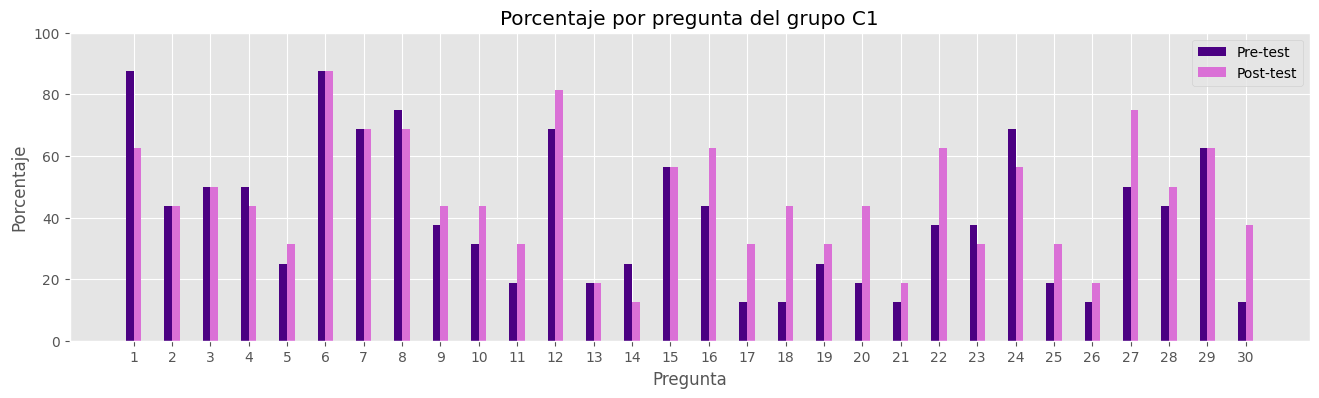

In [12]:
style.use('ggplot')
plt.figure(figsize=(16,4))
barwidth = 0.2
plt.bar(xpos, preguntas_control_1['Porcentajes Pre'], width=barwidth, label='Pre-test', color='indigo')
plt.bar(xpos+0.2, preguntas_control_1['Porcentajes Post'], width=barwidth, label='Post-test', color='orchid')
plt.xticks(xpos+0.1, preguntas_control_1.index)
plt.xlabel('Pregunta')
plt.ylabel('Porcentaje')
plt.title('Porcentaje por pregunta del grupo C1')
plt.legend()
plt.ylim(0, 100)

(0.0, 100.0)

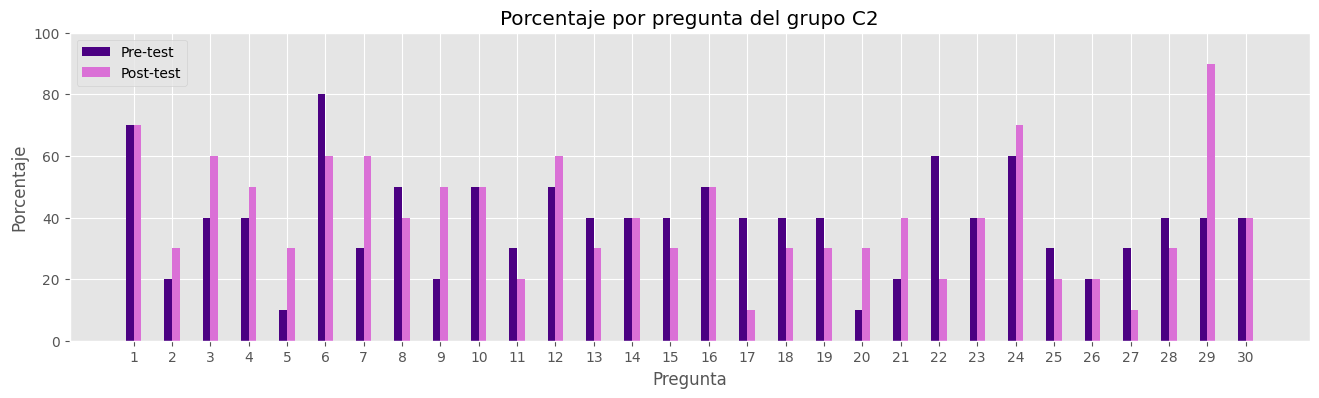

In [13]:
style.use('ggplot')
plt.figure(figsize=(16,4))
barwidth = 0.2
plt.bar(xpos, preguntas_control_2['Porcentajes Pre'], width=barwidth, label='Pre-test', color='indigo')
plt.bar(xpos+0.2, preguntas_control_2['Porcentajes Post'], width=barwidth, label='Post-test', color='orchid')
plt.xticks(xpos+0.1, preguntas_control_1.index)
plt.xlabel('Pregunta')
plt.ylabel('Porcentaje')
plt.title('Porcentaje por pregunta del grupo C2')
plt.legend()
plt.ylim(0, 100)

(0.0, 100.0)

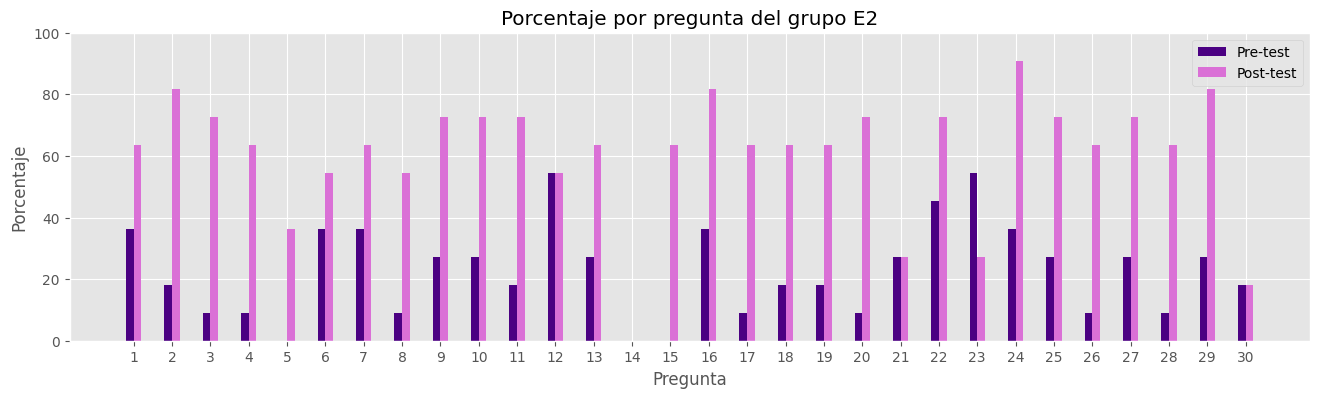

In [14]:
style.use('ggplot')
plt.figure(figsize=(16,4))
barwidth = 0.2
plt.bar(xpos, preguntas_exp_2['Porcentajes Pre'], width=barwidth, label='Pre-test', color='indigo')
plt.bar(xpos+0.2, preguntas_exp_2['Porcentajes Post'], width=barwidth, label='Post-test', color='orchid')
plt.xticks(xpos+0.1, preguntas_control_1.index)
plt.xlabel('Pregunta')
plt.ylabel('Porcentaje')
plt.title('Porcentaje por pregunta del grupo E2')
plt.legend()
plt.ylim(0, 100)

(0.0, 100.0)

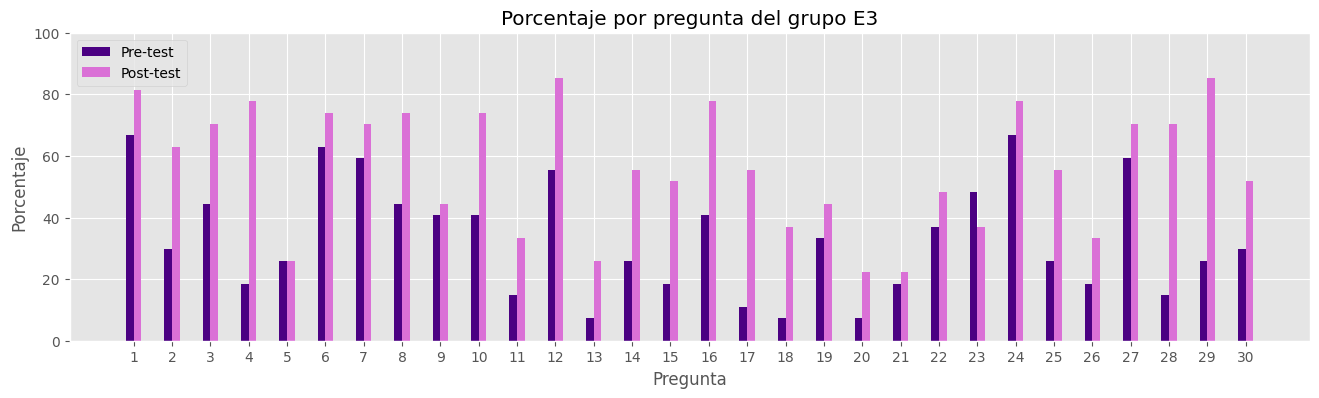

In [34]:
style.use('ggplot')
plt.figure(figsize=(16,4))
barwidth = 0.2
plt.bar(xpos, preguntas_exp_3['Porcentajes Pre'], width=barwidth, label='Pre-test', color='indigo')
plt.bar(xpos+0.2, preguntas_exp_3['Porcentajes Post'], width=barwidth, label='Post-test', color='orchid')
plt.xticks(xpos+0.1, preguntas_control_1.index)
plt.xlabel('Pregunta')
plt.ylabel('Porcentaje')
plt.title('Porcentaje por pregunta del grupo E3')
plt.legend()
plt.ylim(0, 100)

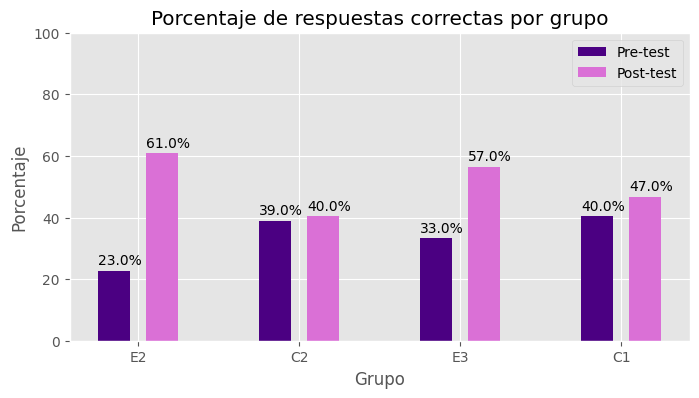

In [31]:
posicion_grupo = np.arange(len(promedios_pre))
plt.figure(figsize=(8,4))
barwidth = 0.2
plt.bar(posicion_grupo, promedios_pre, width=barwidth, label='Pre-test', color='indigo')
plt.bar(posicion_grupo+0.3, promedios_post, width=barwidth, label='Post-test', color='orchid')
plt.xticks(posicion_grupo+0.15, ('E2','C2','E3','C1'))
plt.xlabel('Grupo')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de respuestas correctas por grupo')
plt.legend()
plt.ylim(0, 100)
for i, value in enumerate(promedios_pre):
    plt.text(posicion_grupo[i] - 0.1, value + 2, str(round(value, 0)) + '%', color='black')
for i, value in enumerate(promedios_post):
    plt.text(posicion_grupo[i] + 0.2, value + 2, str(round(value, 0)) + '%', color='black')


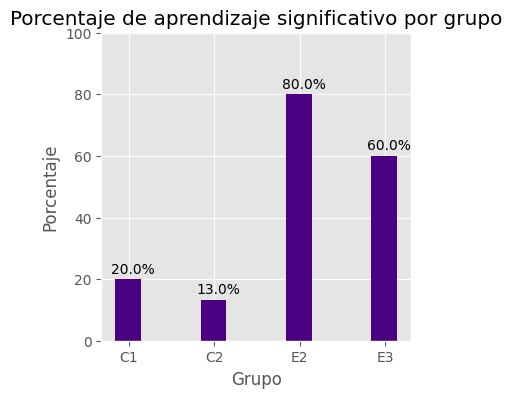

In [63]:
plt.figure(figsize=(4,4))
barwidth = 0.3
plt.bar(posicion_grupo, porcentaje_aprendizaje_significativo, width=barwidth, color='indigo')
plt.xticks(posicion_grupo+0.01, ('C1','C2','E2','E3'))
plt.xlabel('Grupo')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de aprendizaje significativo por grupo')
plt.ylim(0, 100)
for i, value in enumerate(porcentaje_aprendizaje_significativo):
    plt.text(posicion_grupo[i]-0.2, value + 2, str(round(value, 0)) + '%', color='black')

Como conclusión se puede observar en las gráficas y los valores obtenidos del factor de hake que la secuencia didáctica enfocada en el uso de simulaciones phet enfocadas a clases demostrativas-interactivas mejora considerablemente el aprendizaje conceptual de la noción de fuerza, obteniendo aprendizajes significativos mayores al 50% y con una ganancia de aprendizaje media para ambos grupos experimentales, mientras que los grupos control muestran una ganancia baja y un bajo porcentaje de aprendizaje significativo.


In [ ]:

control_1_full.to_excel('/content/drive/MyDrive/FCI/C1/C1.xlsx')
control_2_full.to_excel('/content/drive/MyDrive/FCI/C2/C2.xlsx')
exp_2_full.to_excel('/content/drive/MyDrive/FCI/E2/E2.xlsx')
exp_3_full.to_excel('/content/drive/MyDrive/FCI/E3/E3.xlsx')


In [ ]:
preguntas_control_1.to_excel('/content/drive/MyDrive/FCI/C1/C1_preguntas.xlsx')
preguntas_control_2.to_excel('/content/drive/MyDrive/FCI/C2/C2_preguntas.xlsx')
preguntas_exp_2.to_excel('/content/drive/MyDrive/FCI/E2/E2_preguntas.xlsx')
preguntas_exp_3.to_excel('/content/drive/MyDrive/FCI/E3/E3_preguntas.xlsx')